<div style="font-size:18pt;padding-top:20px; text-align:center">Домашнее задание 1. <b>Дескриптивный анализ данных</b> </div><hr>
<div style="text-align:right;">Куценко А. А <span style="font-style: italic;font-weight: bold;">(ftruf357ft@gmail.com)</span></div>

Подключение стилей оформления

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

# Цель работы
Приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.

# Вариант

In [2]:
surname = "Куценко"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  1
Задача № 1, шаг 11 - вариант:  1
задача № 2 - вариант:  3


## Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI) (6 баллов)

In [3]:
%pwd

'/home/alexander/Programming/ML/MY/mlassignments/notebooks'

### Условие

В качестве индикатора далее необходимо использовать контроль над коррупцией (Control of Corruption) и его показатели `pctrank` и `estimate`.
- Наборы данных:
    - [WGI](https://www.worldbank.org/content/dam/sites/govindicators/doc/wgidataset_excel.zip)
    - [Регионы](https://github.com/MLMethods/Assignments/blob/master/data/A1_Descriptive_Analysis/regions.xlsx)
- [Описание WGI](http://info.worldbank.org/governance/wgi/)

> **Замечание**. Исходный файл с данными редактировать нельзя.

Порядок работы:
1. Загрузите данные в DataFrame
2. Отсортируйте данные по убыванию `pctrank`
3. Отобразите данные по индексу WGI за 2023 год в виде горизонтального столбчатого графика (`pctrank`). Примерный вид графика приведен ниже.
   ![Сортировка WGI по Control of Corruption](../docs/img/cpi_2016_.png)
4. Сформируйте DataFrame из исходного для региона в соответствии с Вашим вариантом
5. Выведите данные DataFrame'a
6. Постройте графики индекса WGI за 1996-2023 для стран своего региона (`estimate`). Примерный вид графика приведен ниж
   ![WGI для стран из региона](../docs/img/fig_springfield_region.png)
7. Найдите страны с наибольшим и наименьшим значением WGI Вашего варианта региона за 2023 год (estimate)
   > **Замечание**. У нескольких стран может быть одна и та же позиция в рейтинге из-за одинаковых значений индекса
8. Определите средние значения региона за каждый год в период с 1996 по 2023 (`estimate`)
9. Постройте графики индекса WGI за 1996-2023 для стран своего региона и выделите страны с наибольшим и наименьшим значением WGI за 2023 год, а также отобразите среднее значение по региону и РФ. Примерный вид графика:
    ![WGI среднее, максимальное, минимальное и по РФ](../docs/img/fig_springfield_region_comb.png)
10. Определите, как изменилось значение показателя rank с 1996 по 2023 (`rank`)
11. Выведите таблицу для Вашего варианта (WGI - `rank`)
12. Отобразите диаграмму размаха (`boxplot`) индекса WGI за 2023 для всех стран и для каждого региона в отдельности (на одном графике) (`estimate`)

### Выполнение

In [4]:
# Базовый уровень бытия
import os
import numpy as np
import pandas as pd

Проверяем наличие датасета локально, если его нет, то скачиваем

In [5]:
%%bash

# Messages from utils in stderr is not an errros
exec 2>&1

datasets_path="../data/A1_DA_dataset"
wgi_path="wgidataset"
wgi_file="wgidataset.xlsx"
regions_file="regions.xlsx"

echo "Let's check the availability of the dataset locally"

if [ ! -f ${datasets_path}/${wgi_path}/${wgi_file} ] || [ ! -f ${datasets_path}/${wgi_path}/${regions_file} ] ;then
    # TODO: need unzip in docker image?
    apt update && apt install unzip

    echo "Dataset files are missing. Downloading..."
    mkdir -p ${datasets_path}/${wgi_path}

    pushd ${datasets_path}

    echo "Downloading dataset"
    curl -s "https://www.worldbank.org/content/dam/sites/govindicators/doc/wgidataset_excel.zip" -o ${wgi_path}.zip
    unzip ${wgi_path}.zip -d ${wgi_path}
    rm ${wgi_path}.zip

    echo "Downloading regions"
    curl -sL "https://github.com/MLMethods/Assignments/raw/refs/heads/master/data/A1_Descriptive_Analysis/regions.xlsx" -o ${wgi_path}/${regions_file}

    popd
else
    echo "Dataset files exist. I'm skipping the download"
fi


Let's check the availability of the dataset locally
Dataset files exist. I'm skipping the download


1. Подгружаем датасет

In [6]:
dataset_path = '../data/A1_DA_dataset/wgidataset/wgidataset.xlsx'

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f'File with dataset {dataset_path} not found!')

# Empty values in the dataset are marked as ".."
dataset_frame = pd.read_excel(dataset_path, na_values=['..'])

dataset_frame

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355
1,ALBcc1996,ALB,Albania,1996,cc,-0.893903,0.315914,3.0,19.354839,2.688172,43.010754
2,DZAcc1996,DZA,Algeria,1996,cc,-0.566741,0.262077,4.0,33.333332,16.666666,52.688171
3,ASMcc1996,ASM,American Samoa,1996,cc,NaN,NaN,NaN,NaN,NaN,NaN
4,ADOcc1996,ADO,Andorra,1996,cc,1.318143,0.480889,1.0,87.096771,72.043015,96.774193
...,...,...,...,...,...,...,...,...,...,...,...
32095,VIRva2023,VIR,Virgin Islands (U.S.),2023,va,NaN,NaN,NaN,NaN,NaN,NaN
32096,WBGva2023,WBG,West Bank and Gaza,2023,va,-1.118067,0.149837,6.0,18.137255,11.764706,24.509804
32097,YEMva2023,YEM,"Yemen, Rep.",2023,va,-1.550217,0.131432,8.0,6.372549,2.450980,11.764706
32098,ZMBva2023,ZMB,Zambia,2023,va,-0.047946,0.118482,12.0,45.098038,39.215687,52.450981


2. Отсортируем по убыванию значения `pctrank`

In [7]:
dataset_frame.sort_values('pctrank', ascending=0)

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
383,SGPge1996,SGP,Singapore,1996,ge,1.993047,0.168259,5.0,100.0,91.256828,100.0
1667,SGPge1998,SGP,Singapore,1998,ge,2.072397,0.205460,5.0,100.0,91.256828,100.0
17907,NORva2012,NOR,Norway,2012,va,1.728163,0.131552,13.0,100.0,96.244133,100.0
27989,SGPrq2020,SGP,Singapore,2020,rq,2.205299,0.208772,8.0,100.0,99.047623,100.0
4877,SGPrq2002,SGP,Singapore,2002,rq,1.888891,0.208489,7.0,100.0,92.972977,100.0
...,...,...,...,...,...,...,...,...,...,...,...
32008,MTQva2023,MTQ,Martinique,2023,va,NaN,NaN,NaN,NaN,NaN,NaN
32024,ANTva2023,ANT,Netherlands Antilles (former),2023,va,NaN,NaN,NaN,NaN,NaN,NaN
32029,NIUva2023,NIU,Niue,2023,va,NaN,NaN,NaN,NaN,NaN,NaN
32047,REUva2023,REU,Réunion,2023,va,NaN,NaN,NaN,NaN,NaN,NaN


3. Из всего датасета нас интересует показатель `Control of Corruption`, обозначенный в поле `indicator` как `cc`. График нужно построить за 2023 год  

In [8]:
# Датафрейм с строками для cc и 2023 годом (NaN значение не отрисовываем)
wgi_cc_2023_frame = dataset_frame\
                    .query('indicator == "cc" and year == 2023')\
                    .filter(items=['countryname', 'year', 'indicator', 'pctrank'])\
                    .dropna()
wgi_cc_2023_frame

,countryname,year,indicator,pctrank
30816,Afghanistan,2023,cc,13.679245
30817,Albania,2023,cc,43.396225
30818,Algeria,2023,cc,30.188679
30819,American Samoa,2023,cc,87.735847
30820,Andorra,2023,cc,87.735847
...,...,...,...,...
31025,Virgin Islands (U.S.),2023,cc,53.301888
31026,West Bank and Gaza,2023,cc,26.415094
31027,"Yemen, Rep.",2023,cc,1.886792
31028,Zambia,2023,cc,36.792454


In [9]:
wgi_cc_2023_pctranks = wgi_cc_2023_frame['pctrank'].unique()
wgi_cc_2023_pctranks = np.flip(np.sort(wgi_cc_2023_pctranks, axis=-1))

# Получили отсортированный по убыванию массив уникальных значений pctrank
print('Top 5 values:')
print(wgi_cc_2023_pctranks[:5])

print('5 lowest values:')
print(wgi_cc_2023_pctranks[-5:])

Top 5 values:
[100.          99.52830505  99.05660248  98.58490753  98.11320496]
5 lowest values:
[1.88679242 1.41509438 0.94339621 0.47169811 0.        ]


In [10]:
# каждому уникальному значению из wgi_cc_2023_pctranks соответствует положение в рейтинге
position_in_rating = {}
counter = 1
for value in wgi_cc_2023_pctranks:
    position_in_rating[value] = counter
    counter += 1

In [11]:
print('5 top values:')
print(list(position_in_rating.items())[:5])

print('5 lowest values')
print(list(position_in_rating.items())[-5:])

5 top values:
[(100.0, 1), (99.52830505371094, 2), (99.05660247802734, 3), (98.58490753173828, 4), (98.11320495605469, 5)]
5 lowest values
[(1.8867924213409424, 199), (1.4150943756103516, 200), (0.9433962106704712, 201), (0.4716981053352356, 202), (0.0, 203)]


In [12]:
# Новый столбец в датафрейме с позицией в рейтинге за 2023 год
wgi_cc_2023_position_values = []

for index, row in wgi_cc_2023_frame.iterrows():
    position_value = position_in_rating[row.pctrank]
    wgi_cc_2023_position_values.append(position_value)

wgi_cc_2023_frame['position'] = wgi_cc_2023_position_values

wgi_cc_2023_frame.sort_values('position', ascending=1)

,countryname,year,indicator,pctrank,position
30868,Denmark,2023,cc,100.000000,1
30881,Finland,2023,cc,99.528305,2
30961,Norway,2023,cc,99.056602,3
30955,New Zealand,2023,cc,98.584908,4
30985,Singapore,2023,cc,98.113205,5
...,...,...,...,...,...
31027,"Yemen, Rep.",2023,cc,1.886792,199
31023,"Venezuela, RB",2023,cc,1.415094,200
30989,Somalia,2023,cc,0.943396,201
31001,Syrian Arab Republic,2023,cc,0.471698,202


In [13]:
# продвинутый уровень бытия
import matplotlib.pyplot as plt

In [14]:
# Значения и подписи на будущей гистограмме
countries_cc_values = []
countries_names = []

for index, row in wgi_cc_2023_frame\
                    .sort_values('position', ascending=0)\
                    .iterrows():
    countries_names.append(f'{row.position}.{row.countryname}')
    countries_cc_values.append(row.pctrank)
    # print(f'{countries_names[-1]}:{countries_cc_values[-1]}')

for type in ['top', 'lowest']:
    sign = -1 if type == 'top' else 1
    # it is necessary to print the lowest possible rating
    penalty = 0 if type == 'top' else 1
    
    print(f'5 {type} countries:')
    for i in range(1, 6):
        index = sign * i - penalty
        print(f'{countries_names[index]}:{countries_cc_values[index]}')
    print()

5 top countries:
1.Denmark:100.0
2.Finland:99.52830505371094
3.Norway:99.05660247802734
4.New Zealand:98.58490753173828
5.Singapore:98.11320495605469

5 lowest countries:
203.South Sudan:0.0
202.Syrian Arab Republic:0.4716981053352356
201.Somalia:0.9433962106704712
200.Venezuela, RB:1.4150943756103516
199.Yemen, Rep.:1.8867924213409424



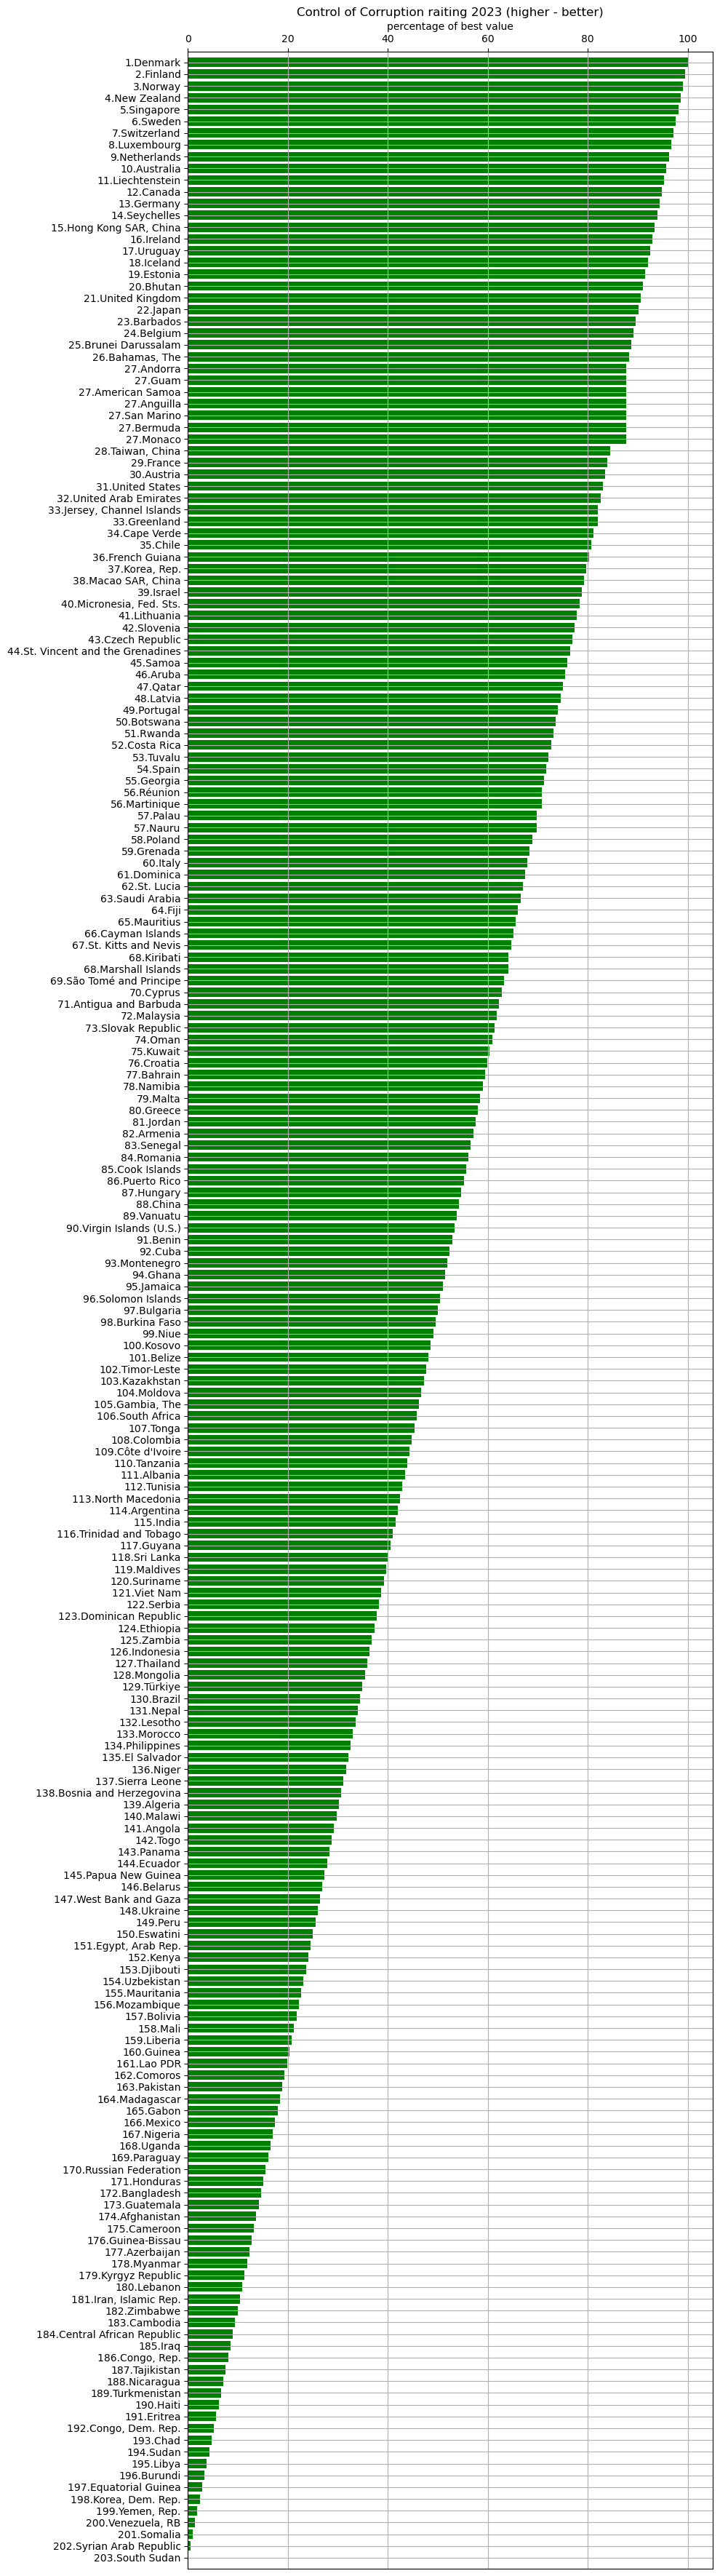

In [15]:
plt.figure('pctrank raiting', figsize=[10, len(countries_names) / 6]) # чем больше высота, тем более различимы значения
plt.title('Control of Corruption raiting 2023 (higher - better)')
plt.barh(countries_names, countries_cc_values, color='green')

ax = plt.gca()              # текущая ось
ax.margins(y = 0.0025)      # уменьшаем вертикальный отступ в %
ax.xaxis.set_label_text('percentage of best value')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

plt.tight_layout()
plt.grid(True)


plt.show()

4. Для варианта 1 регион - Asia Pacific

In [16]:
import math

In [17]:
regions_path = '../data/A1_DA_dataset/wgidataset/regions.xlsx'

if not os.path.exists(regions_path):
    raise FileNotFoundError(f'File with dataset {regions_path} not found!')
    
regions_frame = pd.read_excel(regions_path, na_values=['..'])

# Исправляем неправильные названия стран для Азии
names = {
    # wrong        : right
    'Hong Kong'    : 'Hong Kong SAR, China',
    'Korea, North' : 'Korea, Dem. Rep.',
    'Korea, South' : 'Korea, Rep.',
    'Laos'         : 'Lao PDR',
    'Taiwan'       : 'Taiwan, China',
    'Timor-Leste'  : 'Timor-Leste',
    'Vietnam'      : 'Viet Nam',
}

for wrong, right in names.items():
    regions_frame.loc[regions_frame['Country'] == f'{wrong}', 'Country'] = f'{right}'

regions_frame

,Country,Code,Region
0,Afghanistan,AFG,AP
1,Albania,ALB,ECA
2,Algeria,DZA,MENA
3,Angola,AGO,SSA
4,Argentina,ARG,AME
...,...,...,...
175,Venezuela,VEN,AME
176,Viet Nam,VNM,AP
177,Yemen,YEM,MENA
178,Zambia,ZMB,SSA


Список наименований стран с регионом AP (Asia Pacific):

In [18]:
asia_pacific_countries = regions_frame.query('Region == "AP"').filter(items=['Country', 'Region'])
asia_pacific_countries.sort_values('Country')

,Country,Region
0,Afghanistan,AP
6,Australia,AP
11,Bangladesh,AP
16,Bhutan,AP
25,Cambodia,AP
31,China,AP
54,Fiji,AP
70,"Hong Kong SAR, China",AP
73,India,AP
74,Indonesia,AP


5. Вот все данные из исходного датасета для стран из региона Asia Pacific

In [19]:
asia_pacific_frame = dataset_frame[\
                        dataset_frame.countryname.isin(asia_pacific_countries.Country)\
                    ].query('indicator == "cc"').dropna()
asia_pacific_frame

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355
11,AUScc1996,AUS,Australia,1996,cc,1.877356,0.210325,6.0,93.548386,90.322578,99.462364
16,BGDcc1996,BGD,Bangladesh,1996,cc,-0.969682,0.262077,4.0,17.741936,2.688172,34.946236
23,BTNcc1996,BTN,Bhutan,1996,cc,0.942838,0.340507,2.0,81.182793,66.129036,90.322578
32,KHMcc1996,KHM,Cambodia,1996,cc,-1.019842,0.275614,3.0,16.129032,2.150538,32.795700
...,...,...,...,...,...,...,...,...,...,...,...
31003,TWNcc2023,TWN,"Taiwan, China",2023,cc,1.203369,0.178170,9.0,84.433960,79.716980,90.566040
31006,THAcc2023,THA,Thailand,2023,cc,-0.489051,0.160341,10.0,35.849056,24.056604,48.113209
31007,TMPcc2023,TMP,Timor-Leste,2023,cc,-0.226704,0.207288,7.0,47.641510,31.132076,58.962265
31022,VUTcc2023,VUT,Vanuatu,2023,cc,-0.014865,0.257371,6.0,53.773586,38.207546,63.207546


In [20]:
# Новый датафрейм для будущего графика, первый столбец - наименование страны, второй и далее - показатель cc за год 1996...2023
asia_pacific_cc = pd.DataFrame(data=asia_pacific_countries.Country)

for year in range(1996, 2024):
    year_data = []
    for country in asia_pacific_countries.Country:
        value = asia_pacific_frame\
                    .query(f'countryname == "{country}" and year == {year}')\
                    .filter(items=['estimate'])
        if value.empty:
            year_data.append(math.nan)
        else:
            year_data.append(value.iloc[0,0])
    asia_pacific_cc[f'{year}'] = year_data

# Более удобное представление для графика
asia_pacific_cc = asia_pacific_cc.dropna(axis=1, how='all')
asia_pacific_cc = asia_pacific_cc.set_index('Country').T
asia_pacific_cc

Country,Afghanistan,Australia,Bangladesh,Bhutan,Cambodia,China,Fiji,"Hong Kong SAR, China",India,Indonesia,...,Papua New Guinea,Philippines,Singapore,Solomon Islands,Sri Lanka,"Taiwan, China",Thailand,Timor-Leste,Vanuatu,Viet Nam
1996,-1.291705,1.877356,-0.969682,0.942838,-1.019842,-0.271190,0.659303,1.444894,-0.381090,-0.864106,...,-0.433467,-0.358872,2.107434,0.340782,-0.056539,0.580821,-0.361192,NaN,0.216309,-0.489799
1998,-1.176012,1.798130,-0.773011,0.883641,-0.988312,-0.353955,0.663798,1.303382,-0.258727,-1.160077,...,-0.698878,-0.381950,2.057286,0.361923,-0.083365,0.583798,-0.141036,NaN,0.238910,-0.491154
2000,-1.271724,1.862088,-1.212083,0.574340,-0.967183,-0.208549,0.630552,1.292820,-0.403302,-0.908694,...,-0.786501,-0.527594,2.139873,0.177562,-0.199229,0.696333,-0.230174,NaN,0.227800,-0.584863
2002,-1.251137,1.761436,-1.449087,0.449922,-0.990784,-0.557898,0.610876,1.666942,-0.555382,-1.137303,...,-0.947748,-0.538532,2.262734,0.182450,-0.216593,0.619227,-0.338848,-0.222040,0.230140,-0.560991
2003,-1.344180,1.895287,-1.541721,1.087011,-0.989836,-0.395265,0.276082,1.800160,-0.456321,-0.979824,...,-0.813448,-0.635372,2.169168,0.214312,-0.272020,0.814145,-0.196024,-0.249595,0.262945,-0.490873
2004,-1.350647,2.005869,-1.597115,0.893403,-1.058346,-0.565062,0.290087,1.849274,-0.448476,-0.976612,...,-0.995903,-0.707702,2.301146,-0.065691,-0.167388,0.812444,-0.246132,-0.335041,-0.138782,-0.756660
2005,-1.447252,1.942668,-1.406467,0.871917,-1.223740,-0.617888,-0.224627,1.770194,-0.363161,-0.906052,...,-1.151023,-0.662844,2.156098,0.087781,-0.339862,0.741855,-0.206433,-0.569692,0.294559,-0.729582
2006,-1.446292,1.950813,-1.442983,0.854817,-1.260386,-0.518888,0.184131,1.857167,-0.274563,-0.864276,...,-1.139937,-0.889427,2.174917,-0.202771,-0.194801,0.527315,-0.413430,-0.598673,0.192251,-0.747617
2007,-1.613251,2.000873,-1.063240,0.928756,-1.151690,-0.599235,0.121461,1.908178,-0.397690,-0.630509,...,-1.118342,-0.778005,2.231212,-0.374891,-0.146114,0.518874,-0.400172,-0.648966,0.273236,-0.630166
2008,-1.672096,2.027343,-1.046788,0.912390,-1.241711,-0.526308,0.098342,1.886837,-0.339098,-0.639086,...,-1.176470,-0.778095,2.231618,-0.354255,-0.218608,0.514258,-0.440627,-0.650319,0.357459,-0.711533


6. Строим графики для стран Asia Pacific

In [21]:
asia_pacific_cc.T.columns

Index(['1996', '1998', '2000', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

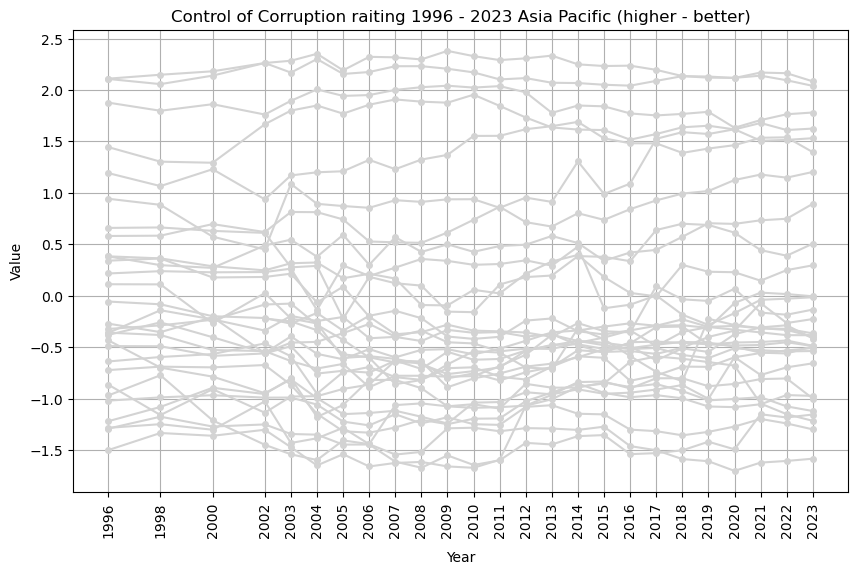

In [22]:
# Некоторые года в исходном датасете отсутствуют, поэтому нельзя просто взять range(1996,2024)
years = [ int(year) for year in asia_pacific_cc.T.columns[:] ]
# years

def plot_asia_cc(params={}):
    # Пример обращения к столбцу для Афганистана - вернется series для Афганистана от 1996 до 2023
    # asia_pacific_cc['Afghanistan']
    
    plt.figure('CC in 1996-2023 in Asia Pacific region', figsize=[10, 6])
    plt.title('Control of Corruption raiting 1996 - 2023 Asia Pacific (higher - better)')

    max_countries = params.get('max', {}).get('countries', [])
    max_color = params.get('max', {}).get('color', [])
    min_countries = params.get('min', {}).get('countries', [])
    min_color = params.get('min', {}).get('color', [])

    for country in asia_pacific_countries['Country']:
        color = 'lightgray'
        label = ''

        if country in max_countries:
            color = f'{max_color}'
            label = 'max'
        elif country in min_countries:
            color = f'{min_color}'
            label = 'min'
        
        plt.plot(years, asia_pacific_cc[f'{country}'], color=color, marker='o', markersize=4, label=label)

    # Обрабатываем все дополнительные данные
    additionals = [key for key in params if key not in ['min', 'max']]
    for country in additionals:
        data = params.get(f'{country}', {}).get('data', [])
        color = params.get(f'{country}', {}).get('color', 'red')
        label = f'{country}'
        
        plt.plot(years, data, color=color, marker='o', markersize=4, label=label)

    if params:
        plt.legend(loc=1, fontsize=12)
        
    plt.grid(True)
    plt.xticks(years, rotation=90)
    plt.xlabel('Year', labelpad=10)
    plt.ylabel('Value')
    plt.show()

plot_asia_cc()

7. Теперь найдем страны с максимальным и минимальным значением индекса

In [23]:
# Удобнее забирать столбцы, а не строки, поэтому транспонируем датафрейм и заберем столбец за 2023 год
year = years[-1]
asia_pacific_cc_2023_data = asia_pacific_cc.T[f'{year}']

asia_pacific_cc_2023 = {}
asia_pacific_cc_2023['min'] = asia_pacific_cc_2023_data.min()
asia_pacific_cc_2023['max'] = asia_pacific_cc_2023_data.max()
asia_pacific_cc_2023['mean'] = asia_pacific_cc_2023_data.mean()

print(f'All data for Asia Pacific for {year}')
print(f'{asia_pacific_cc_2023_data.sort_values()}\n')
print(f'{"Min value":<15}: {asia_pacific_cc_2023["min"]:>10}')
print(f'{"Max value":<15}:  {asia_pacific_cc_2023["max"]:>10}')
print(f'{"Mean value":<15}: {asia_pacific_cc_2023["mean"]:>10}')

All data for Asia Pacific for 2023
Country
Korea, Dem. Rep.       -1.584476
Cambodia               -1.299217
Myanmar                -1.216499
Afghanistan            -1.154932
Bangladesh             -1.120866
Pakistan               -0.999357
Lao PDR                -0.973836
Papua New Guinea       -0.657154
Philippines            -0.537640
Nepal                  -0.507928
Mongolia               -0.492604
Thailand               -0.489051
Indonesia              -0.486872
Viet Nam               -0.415814
Maldives               -0.396943
Sri Lanka              -0.383977
India                  -0.366015
Timor-Leste            -0.226704
Solomon Islands        -0.134711
Vanuatu                -0.014865
China                  -0.005370
Malaysia                0.295621
Fiji                    0.506272
Korea, Rep.             0.894089
Taiwan, China           1.203369
Japan                   1.395661
Bhutan                  1.531423
Hong Kong SAR, China    1.625145
Australia               1.781205


In [24]:
countries_max = asia_pacific_cc_2023_data[asia_pacific_cc_2023_data == asia_pacific_cc_2023['max']].index.to_list()
countries_max

['New Zealand']

In [25]:
countries_min = asia_pacific_cc_2023_data[asia_pacific_cc_2023_data == asia_pacific_cc_2023['min']].index.to_list()
countries_min

['Korea, Dem. Rep.']

8. Найдем все средние значения региона Asia Pacific за 1996-2023 годы

In [26]:
asia_pacific_means_1996_2023 = [asia_pacific_cc.T[f'{year}'].mean() for year in years]
asia_pacific_means_1996_2023

[0.005390121166904767,
 0.004409123708804448,
 -0.03511409113804499,
 -0.04934098553513327,
 -0.03201416255004944,
 -0.12487848872138609,
 -0.15484253269049428,
 -0.16874835952635733,
 -0.1554863599519576,
 -0.17264259486429154,
 -0.1757663096631727,
 -0.1606008369595774,
 -0.15394322898599408,
 -0.0850167356191143,
 -0.06684924614044928,
 -0.003774962117595057,
 -0.06374600673875501,
 -0.08608150404066808,
 -0.041266466723755,
 -0.027243216792421955,
 -0.0244332232302235,
 0.006628758243976101,
 0.01564465403076141,
 0.005998003206426098,
 -0.0034764338164560257]

9. Подсветим на графике по `estimate` страну с наибольшим/наименьшим значениями, а также среднее по региону и Россию 

In [27]:
# Нужны данные по России за 1996-2023 год из исходного датасета
russia_frame = dataset_frame[dataset_frame.countryname =='Russian Federation']\
                   .query('indicator == "cc"')\
                   .dropna()\
                   .filter(items=['year','estimate', 'pctrank']).set_index('year')
russia_frame['estimate']

year
1996   -1.053342
1998   -0.954374
2000   -0.943414
2002   -0.954848
2003   -0.783092
2004   -0.825626
2005   -0.847121
2006   -0.940848
2007   -1.017581
2008   -1.125229
2009   -1.141307
2010   -1.099215
2011   -1.074377
2012   -1.051572
2013   -1.020724
2014   -0.918883
2015   -0.974070
2016   -0.838650
2017   -0.914681
2018   -0.869340
2019   -0.822259
2020   -0.930568
2021   -0.921021
2022   -0.979840
2023   -1.104678
Name: estimate, dtype: float64

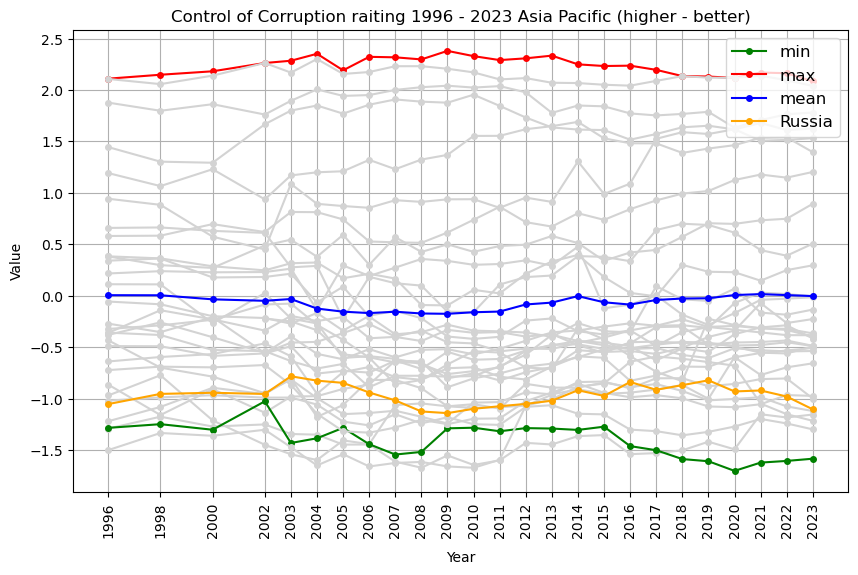

In [28]:
params = {}
params['max'] = {}
params['max']['countries'] = countries_max
params['max']['color'] = 'red'

params['min'] = {}
params['min']['countries'] = countries_min
params['min']['color'] = 'green'

params['mean'] = {}
params['mean']['data'] = asia_pacific_means_1996_2023
params['mean']['color'] = 'blue'

params['Russia'] = {}
params['Russia']['data'] = russia_frame['estimate']
params['Russia']['color'] = 'orange'


plot_asia_cc(params)

10. Определим, как изменилось значение `pctrank` для стран региона Asia Pacific за 1996-2023 годы

In [29]:
asia_pacific_pctrank = pd.DataFrame(data=asia_pacific_countries.Country)
first_year = years[0]
last_year = years[-1]

for year in years:
    year_data = []
    for country in asia_pacific_countries.Country:
        value = asia_pacific_frame\
                    .query(f'countryname == "{country}" and year == {year}')\
                    .filter(items=['pctrank'])
        if value.empty:
            year_data.append(math.nan)
        else:
            year_data.append(value.iloc[0,0])
    asia_pacific_pctrank[f'{year}'] = year_data

asia_pacific_pctrank = asia_pacific_pctrank.dropna(axis=1, how='all')
asia_pacific_pctrank = asia_pacific_pctrank.set_index('Country').T
asia_pacific_pctrank

Country,Afghanistan,Australia,Bangladesh,Bhutan,Cambodia,China,Fiji,"Hong Kong SAR, China",India,Indonesia,...,Papua New Guinea,Philippines,Singapore,Solomon Islands,Sri Lanka,"Taiwan, China",Thailand,Timor-Leste,Vanuatu,Viet Nam
1996,4.301075,93.548386,17.741936,81.182793,16.129032,48.387096,73.655914,89.784943,43.010754,22.043011,...,40.322582,45.698925,97.311829,65.053764,54.301075,73.118279,45.161289,NaN,62.365593,37.096775
1998,8.021390,92.513367,28.877005,81.283424,19.251337,45.989304,74.331551,86.631020,49.732620,10.695188,...,31.016043,44.385025,96.791443,65.240639,53.475937,72.192513,51.336899,NaN,61.497326,38.502674
2000,4.787234,93.617020,6.914894,71.276596,18.085106,49.468086,72.340424,85.638298,43.617020,21.808510,...,28.191490,37.765957,97.340424,61.170212,50.000000,73.936172,48.404255,NaN,62.765957,36.170212
2002,4.761905,92.063492,1.587302,70.899467,17.460318,35.978836,73.544975,91.534393,36.507938,8.465609,...,21.164021,37.037037,98.941795,61.375660,50.264549,74.074074,44.444443,49.206348,62.962963,35.449734
2003,4.761905,93.650795,0.529101,82.010582,14.285714,43.915344,65.079369,92.592590,40.740742,15.343915,...,23.809525,33.862434,97.883598,61.904762,47.619049,75.661377,51.322750,48.148148,64.021164,39.682541
2004,6.403941,96.551727,0.985222,80.788177,14.285714,33.497536,63.546799,94.088669,37.931034,17.733990,...,15.763547,28.078817,98.522171,54.187191,50.738914,77.339905,48.275864,43.349754,52.709358,26.600985
2005,1.463415,95.609756,2.926829,79.024391,10.243902,32.195122,49.756096,93.170731,44.878048,18.536585,...,13.170732,30.731707,98.048782,58.048782,46.829269,73.170731,50.731709,34.634148,63.902439,25.853659
2006,1.951220,95.121948,2.926829,77.560974,7.317073,37.073170,60.000000,93.658539,47.317074,20.487804,...,10.243902,20.000000,98.048782,50.243904,51.219513,72.195122,40.000000,33.170731,60.975609,25.365854
2007,0.970874,95.631065,13.592233,78.155342,10.679611,32.524273,59.708736,93.689323,41.262135,31.067961,...,11.650485,23.786407,98.058250,43.203884,52.912621,72.330093,40.291264,30.097088,63.106796,31.553398
2008,0.485437,96.116508,15.048544,78.640778,5.339806,36.407768,59.708736,94.174759,43.689320,32.524273,...,9.708738,23.786407,98.058250,43.203884,50.485435,72.815536,38.834953,31.553398,66.504852,28.640778


11. Сформируем данные для сравнительной таблицы и выведем ее

In [30]:
%pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [31]:
from prettytable import PrettyTable

In [32]:
table = PrettyTable()
table.field_names = ['', 'Регион', 'Страна', 'WGI 1996', 'WGI 2023', 'Изменение']
table.align = 'c'

mean_1996 = asia_pacific_means_1996_2023[0]
mean_2023 = asia_pacific_means_1996_2023[-1]
mean_delta = mean_2023 - mean_1996
table.add_row([f'mean {last_year}', 'AP', '—', f'{mean_1996}', f'{mean_2023}', f'{mean_delta}'])

for country in countries_max:
    region = regions_frame.set_index('Country').T[f'{country}']['Region']
    wgi_1996 = asia_pacific_pctrank[f'{country}'][f'{first_year}']
    wgi_2023 = asia_pacific_pctrank[f'{country}'][f'{last_year}']
    delta = wgi_2023 - wgi_1996

    table.add_row([f'max {last_year}', region, country, wgi_1996, wgi_2023, delta])

for country in countries_min:
    region = regions_frame.set_index('Country').T[f'{country}']['Region']
    wgi_1996 = asia_pacific_pctrank[f'{country}'][f'{first_year}']
    wgi_2023 = asia_pacific_pctrank[f'{country}'][f'{last_year}']
    delta = wgi_2023 - wgi_1996

    table.add_row([f'min {last_year}', region, country, wgi_1996, wgi_2023, delta])

russia_region = regions_frame.set_index('Country').T[f'{"Russia"}']['Region']
russia_1996 = russia_frame.T[first_year]['pctrank']
russia_2023 = russia_frame.T[last_year]['pctrank']
russia_delta = russia_2023 - russia_1996

table.add_row(['Russia_2023', russia_region, 'Russia', f'{russia_1996}', f'{russia_2023}', f'{russia_delta}'])

table

,Регион,Страна,WGI 1996,WGI 2023,Изменение
mean 2023,AP,—,0.005390121166904767,-0.0034764338164560257,-0.008866554983360793
max 2023,AP,New Zealand,97.8494644165039,98.58490753173828,0.735443115234375
min 2023,AP,"Korea, Dem. Rep.",4.838709831237793,2.358490467071533,-2.4802193641662598
Russia_2023,ECA,Russia,15.053763389587402,15.566038131713867,0.5122747421264648


12. Построим диаграмму размаха для всех стран и по регионам

In [33]:
regions_frame['Region'].unique()

array(['AP', 'ECA', 'MENA', 'SSA', 'AME', 'WE/EU'], dtype=object)

In [34]:
# Подготовим данные для графика
regions_data = {}
for region_code in regions_frame['Region'].unique():
    region_countries = regions_frame.query(f'Region == "{region_code}"').filter(items=['Country', 'Region'])
    region_frame = dataset_frame[dataset_frame.countryname.isin(region_countries.Country)]\
                       .query(f'indicator == "cc" and year == {last_year}')\
                       .dropna()\
                       .filter(items=['countryname', 'estimate'])\
                       .set_index('countryname')
    regions_data[region_code] = region_frame['estimate'].to_numpy()
regions_data

{'AP': array([-1.15493178,  1.78120494, -1.12086642,  1.53142273, -1.29921675,
        -0.0053701 ,  0.50627202,  1.62514544, -0.36601475, -0.4868722 ,
         1.39566064, -1.58447635,  0.89408857, -0.97383636,  0.29562137,
        -0.39694333, -0.4926044 , -1.21649933, -0.50792795,  2.08409548,
        -0.99935746, -0.65715402, -0.53763998,  2.04018402, -0.13471074,
        -0.383977  ,  1.20336866, -0.48905078, -0.22670417, -0.01486515,
        -0.41581428]),
 'ECA': array([-0.33221853,  0.05839965, -1.19547141, -0.66502804, -0.58156002,
         0.6176948 , -0.26659307, -0.18528606, -0.28033847, -0.07930987,
        -0.34861547, -0.44720426, -1.3787334 , -1.42362428, -0.68614632,
        -0.80752933]),
 'MENA': array([-0.58930832,  0.17778482, -1.32103753,  0.82935941,  0.08865869,
         0.20661183, -1.22706246, -1.52501881, -0.53634858,  0.21515796,
         0.70220983,  0.53604299, -0.34189978,  1.07366383]),
 'SSA': array([-0.6099202 , -0.04957945,  0.68579209, -0.16961551, -

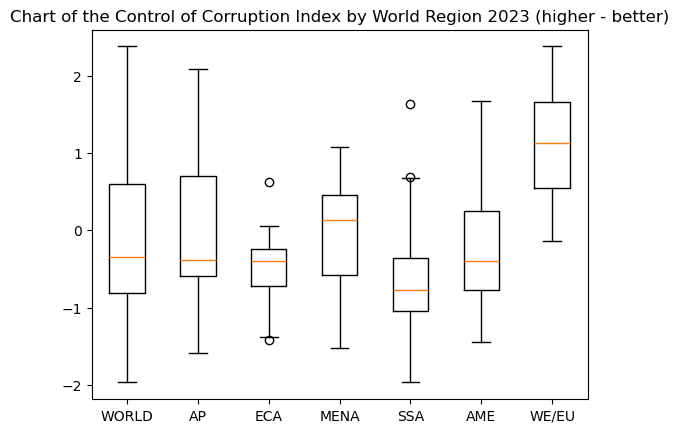

In [35]:
# Рисуем диаграмму размаха

world = np.concatenate(list(regions_data.values()))

data = [world]
labels = ['WORLD']
for key in regions_data:
    data.append(regions_data[f'{key}'])
    labels.append(f'{key}')

plt.boxplot(data, labels=labels)
plt.title('Chart of the Control of Corruption Index by World Region 2023 (higher - better)')
plt.show()

In [36]:
# Данные со всего мира
all_values = np.concatenate(list(regions_data.values()))
all_values.sort()
all_values

array([-1.96955538e+00, -1.73283362e+00, -1.58447635e+00, -1.57037270e+00,
       -1.55602598e+00, -1.52501881e+00, -1.50206709e+00, -1.48240697e+00,
       -1.47526491e+00, -1.44387412e+00, -1.42362428e+00, -1.38844013e+00,
       -1.37873340e+00, -1.32103753e+00, -1.31139302e+00, -1.29921675e+00,
       -1.26121604e+00, -1.22706246e+00, -1.21649933e+00, -1.19547141e+00,
       -1.16255975e+00, -1.15493178e+00, -1.12161291e+00, -1.12086642e+00,
       -1.11195815e+00, -1.05772293e+00, -1.04257476e+00, -1.04097438e+00,
       -1.02057874e+00, -1.01552844e+00, -1.00018215e+00, -9.99357462e-01,
       -9.90109265e-01, -9.73836362e-01, -8.97673428e-01, -8.88349295e-01,
       -8.61831546e-01, -8.38301063e-01, -8.28437746e-01, -8.22652638e-01,
       -8.07529330e-01, -7.80927420e-01, -7.70913005e-01, -7.34985471e-01,
       -7.21040905e-01, -6.86146319e-01, -6.65028036e-01, -6.57154024e-01,
       -6.47337437e-01, -6.28094196e-01, -6.19174957e-01, -6.09920204e-01,
       -6.02811515e-01, -

## Задание 2. Анализ рынка акций (4 балла)

## Условие

1. Загрузить [набор данных](https://github.com/MLMethods/Assignments/blob/master/data/A1_Descriptive_Analysis/stock), каждый файл содержит данные по одной акции (компании). Все данные загрузить в один датафрейм, в качестве индекса для него взять поле "Date", наименование столбцов - название акции (название файла без .csv), содержание столбца - значение столбца "Close" для каждой акции;
2. Рассчитать корреляционную матрицу для всех акций
3. Отобразить корреляционную матрицу в виде диаграммы. Примерный вид графика ниже: ![корреляция](../docs/img/fig_corr_matrix.png)
4. Согласно варианту определить:
   - акцию с максимальной положительной корреляцией (max);
   - акцию с максимальной отрицательной корреляцией (min);
   - акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none);
5. Построить диаграммы разброса (Ваша компания - Компания с min), (Ваша компания - Компания с max), (Ваша компания - Компания с none);
6. Рассчитать среднюю цену акций для каждого месяца (исходные данные взяты с интервалом в месяц);
7. Построить графики для акций из пункта 4 и средней из пункта 6. Примерный вид графика приведен ниже: ![график стоимости акций](../docs/img/fig_tw_comp.png)

1. Загружаем набор данных в один датафрейм

Подгружаем данные, если их нет локально

In [37]:
%%bash

# Messages from utils in stderr is not an errros
exec 2>&1

dataset_path="../data/A1_StockMarket_dataset/stock"

mkdir -p ${dataset_path}
count_files=$(find ${dataset_path} -maxdepth 1 -type f | wc -l)

echo "Let's check the availability of the dataset locally"

if (( count_files == 0 )); then
    # TODO: need unzip in docker image?
    apt update && apt install unzip
    curl -L "https://github.com/MLMethods/Assignments/archive/refs/heads/master.zip" -o archive.zip
    mkdir -p tmp
    unzip archive.zip -d tmp
    cp -r tmp/Assignments-master/data/A1_Descriptive_Analysis/stock/* "${dataset_path}"
    rm -rf tmp
    rm -rf archive.zip
    
else
    echo "Files are available locally"
fi

Let's check the availability of the dataset locally
Files are available locally


In [38]:
dataset_path = "../data/A1_StockMarket_dataset/stock"
files = files = os.listdir(dataset_path)

data = {}
columns = []
is_first_file = True

# print(files)

columns = ['Date'] + [os.path.splitext(file)[0] for file in files]

for file in files:
    basename = os.path.splitext(f'{file}')[0]
    tmp = pd.read_csv(dataset_path + '/' + f'{file}')

    if is_first_file:
        data['Date'] = tmp['Date']
        is_first_file = False

    data[f'{basename}'] = tmp['Close']

stock_dataset = pd.DataFrame(data).set_index('Date')
stock_dataset

,GOOGL,ABNB,META,INTC,ADBE,EBAY,NVDA,PINS,MU,AAPL,...,GTLB,XIACY,SHOP,ORCL,UBER,SPOT,NFLX,MSFT,DBX,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,135.303497,153.970001,313.260010,48.820000,534.299988,60.070000,244.860001,29.559999,82.269997,174.779999,...,64.010002,10.7350,48.450001,81.160004,37.400002,196.259995,427.140015,310.980011,24.750000,149.573502
2022-02-01,135.057007,151.490005,211.029999,47.700001,467.679993,54.590000,243.850006,26.750000,88.860001,165.119995,...,58.270000,9.5500,57.189999,75.970001,36.029999,156.190002,394.519989,298.790009,22.690001,153.563004
2022-03-01,139.067505,171.759995,222.360001,49.560001,455.619995,57.259998,272.859985,24.610001,77.889999,174.610001,...,54.450001,8.7199,64.599998,82.730003,35.680000,151.020004,374.589996,308.309998,23.250000,162.997498
2022-04-01,114.109497,153.210007,200.470001,43.590000,395.950012,51.919998,185.470001,20.520000,68.190002,157.649994,...,47.930000,7.5400,67.580002,73.400002,31.480000,101.650002,190.360001,277.519989,21.750000,124.281502
2022-05-01,113.762001,120.870003,193.639999,44.419998,416.480011,48.669998,186.720001,19.650000,73.839996,148.839996,...,38.939999,7.6300,66.489998,71.919998,23.200001,112.769997,197.440002,271.869995,20.840000,120.209503
2022-06-01,108.962997,89.080002,161.250000,37.410000,366.059998,41.669998,151.589996,18.160000,55.279999,136.720001,...,53.139999,8.6300,54.570000,69.870003,20.459999,93.830002,174.869995,256.829987,20.990000,106.209999
2022-07-01,116.320000,110.980003,159.100006,36.310001,410.119995,48.630001,181.630005,19.480000,61.860001,162.509995,...,57.400002,7.8900,47.189999,77.839996,23.450001,113.019997,224.899994,280.739990,22.740000,134.949997
2022-08-01,108.220001,113.120003,162.929993,31.920000,373.440002,44.130001,150.940002,23.040001,56.529999,157.220001,...,59.869999,7.1900,72.820000,74.150002,28.760000,108.150002,223.559998,261.470001,21.389999,126.769997
2022-09-01,95.650002,105.040001,135.679993,25.770000,275.200012,36.810001,121.389999,23.299999,50.099998,138.199997,...,51.220001,5.5800,77.900002,61.070000,26.500000,86.300003,235.440002,232.899994,20.719999,113.000000


2. Корреляционная матрица для датасета

In [39]:
stock_corr = stock_dataset.corr()
stock_corr

,GOOGL,ABNB,META,INTC,ADBE,EBAY,NVDA,PINS,MU,AAPL,...,GTLB,XIACY,SHOP,ORCL,UBER,SPOT,NFLX,MSFT,DBX,AMZN
GOOGL,1.000000,0.780440,0.808784,0.826042,0.915440,0.375794,0.715287,0.640675,0.867191,0.806847,...,0.535473,0.680658,-0.725121,0.618983,0.737311,0.821587,0.717756,0.845993,0.669228,0.912332
ABNB,0.780440,1.000000,0.723419,0.738241,0.670509,0.644140,0.649664,0.554616,0.842928,0.617430,...,0.460602,0.564475,-0.378079,0.471504,0.680764,0.753797,0.646901,0.679204,0.332740,0.830690
META,0.808784,0.723419,1.000000,0.594611,0.873388,0.190361,0.961389,0.822643,0.858401,0.705358,...,0.467641,0.573429,-0.687123,0.821696,0.954444,0.973401,0.897908,0.966868,0.552874,0.830910
INTC,0.826042,0.738241,0.594611,1.000000,0.713875,0.580047,0.458281,0.452144,0.839860,0.507251,...,0.535441,0.791377,-0.691324,0.239485,0.512572,0.645555,0.447049,0.627531,0.390625,0.816519
ADBE,0.915440,0.670509,0.873388,0.713875,1.000000,0.180354,0.802739,0.804657,0.817961,0.833129,...,0.496556,0.697612,-0.750258,0.785432,0.834611,0.863827,0.821314,0.913842,0.816359,0.819614
EBAY,0.375794,0.644140,0.190361,0.580047,0.180354,1.000000,0.087027,-0.002757,0.512637,0.115591,...,0.251066,0.535223,-0.587906,-0.070414,0.085736,0.296858,0.138580,0.127010,-0.157363,0.434078
NVDA,0.715287,0.649664,0.961389,0.458281,0.802739,0.087027,1.000000,0.815629,0.796707,0.633114,...,0.404702,0.445645,-0.534172,0.875089,0.969790,0.925270,0.910910,0.935386,0.519374,0.765294
PINS,0.640675,0.554616,0.822643,0.452144,0.804657,-0.002757,0.815629,1.000000,0.717881,0.640294,...,0.525458,0.524413,0.132850,0.747754,0.907751,0.842858,0.930638,0.837576,0.710191,0.666996
MU,0.867191,0.842928,0.858401,0.839860,0.817961,0.512637,0.796707,0.717881,1.000000,0.606787,...,0.543109,0.720374,-0.581191,0.570765,0.820809,0.902439,0.789551,0.849930,0.440043,0.906932
AAPL,0.806847,0.617430,0.705358,0.507251,0.833129,0.115591,0.633114,0.640294,0.606787,1.000000,...,0.282373,0.408747,-0.535370,0.769309,0.661323,0.687415,0.701937,0.790691,0.740429,0.665715


3. Корреляционная матрица в виде диаграммы

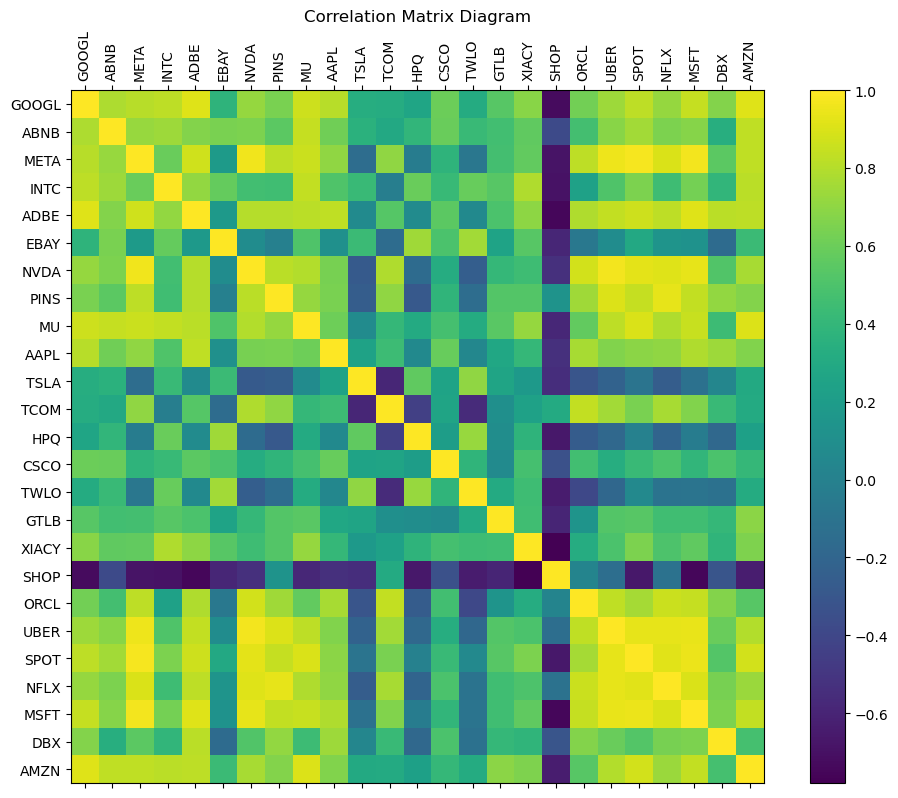

In [40]:
labels = stock_corr.columns.to_list()

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(stock_corr)
fig.colorbar(cax)

plt.xticks(range(len(stock_corr.columns)), stock_corr.columns, rotation=90)
plt.yticks(range(len(stock_corr.columns)), stock_corr.columns)
plt.title("Correlation Matrix Diagram")


plt.show()

4. Для варианта 3 надо найти максимально, минимально коррелирующие акции с акцией компании Oracle (ORCL), а также наиболее некоррелирующую акцию (none)

In [41]:
COMPANY = 'ORCL'

orcl_corr = {}
orcl_corr['min'] = stock_corr.T[COMPANY].sort_values().index[0]
orcl_corr['max'] = stock_corr.T[COMPANY].sort_values(ascending=0).index[1]
orcl_corr['none'] = abs(stock_corr.T[COMPANY]).sort_values().index[0]

print(f"Min correlation: {orcl_corr['min']} ({stock_corr[COMPANY][orcl_corr['min']]})")
print(f"Max correlation: {orcl_corr['max']} ({stock_corr[COMPANY][orcl_corr['max']]})")
print(f"None correlation: {orcl_corr['none']} ({stock_corr[COMPANY][orcl_corr['none']]})")


Min correlation: TWLO (-0.393535537911863)
Max correlation: NVDA (0.875088713879195)
None correlation: SHOP (0.023692039836557897)


5. Строим диаграммы разброса акций компании из варианта (ORCL) с акциями, наденными выше

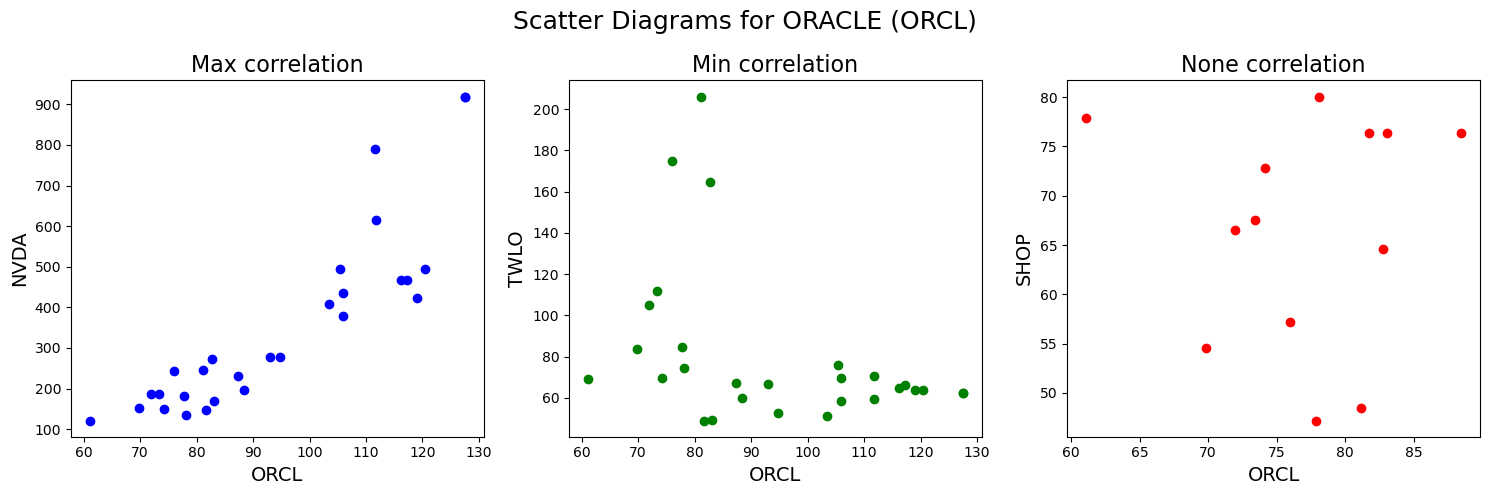

In [42]:
# Рисуем диаграммы разброса

keys = ['max','min', 'none']
x = [stock_dataset[COMPANY] for _ in range(len(keys))]
y = [stock_dataset[orcl_corr[j]] for j in keys]
plot_settings = [
    {"color": "blue", "marker": "o", "title": "Max correlation"},
    {"color": "green", "marker": "o", "title": "Min correlation"},
    {"color": "red", "marker": "o", "title": "None correlation"}
]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i, ax in enumerate(axes):
    ax.scatter(x[i], y[i],
              color=plot_settings[i]['color'],
              marker=plot_settings[i]['marker'])
    
    ax.set_title(plot_settings[i]['title'], fontsize=16)
    ax.set_xlabel(COMPANY, fontsize=14)
    ax.set_ylabel(orcl_corr[keys[i]], fontsize=14)

plt.suptitle('Scatter Diagrams for ORACLE (ORCL)', fontsize=18)
plt.tight_layout()
plt.show()

6. Срдение по месяцам

In [43]:
stock_means = stock_dataset.mean(axis=1)
stock_means

Date
2022-01-01    150.600880
2022-02-01    137.431334
2022-03-01    142.045395
2022-04-01    113.836173
2022-05-01    110.482993
2022-06-01     97.469452
2022-07-01    111.341999
2022-08-01    105.998399
2022-09-01     93.775600
2022-10-01     96.541201
2022-11-01     99.699599
2022-12-01     91.402200
2023-01-01    107.002758
2023-02-01    108.613126
2023-03-01    120.210832
2023-04-01    118.584166
2023-05-01    134.344584
2023-06-01    148.794582
2023-07-01    156.775000
2023-08-01    155.579584
2023-09-01    145.393333
2023-10-01    144.340623
2023-11-01    162.973751
2023-12-01    168.482916
2024-01-01    178.837501
2024-02-01    194.328293
2024-03-01    201.071667
2024-03-12    201.071667
dtype: float64

7. Строим график по имеющимся данным

In [44]:
import matplotlib.dates as mdates

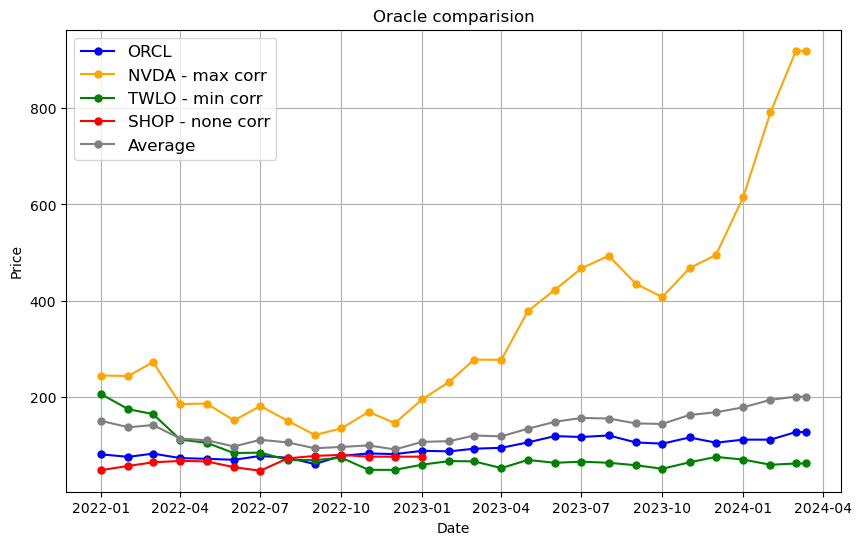

In [45]:
plt.figure('ORACLE comparision', figsize=[10,6])

companies = [f'{COMPANY}'] + [orcl_corr[key] for key in keys]
colors = { f'{COMPANY}' : 'blue',  'max' : 'orange', 'min': 'green', 'none': 'red'}

plot_settings = []

# Настройки для ORACLE
plot_settings.append({"color": f"{colors[COMPANY]}", "marker": "o", "label": f"{COMPANY}"})

for key in keys:
    company = orcl_corr[key]
    plot_settings.append({"color": f"{colors[key]}", "marker": "o", "label": f"{company} - {key} corr"})

dates = pd.to_datetime( stock_dataset[COMPANY].index.to_list() )

for i in range(len(companies)):
    company = companies[i]
    plt.plot(dates, stock_dataset[company],
             marker='o',
             markersize=5,
             color=plot_settings[i]['color'],
             label=plot_settings[i]['label'])

# Отдельно добаввим средние на график
plt.plot(dates, stock_means, marker='o', markersize=5, label='Average', color='grey')

plt.legend(loc=0, fontsize=12)
    
plt.grid(True)
plt.title('Oracle comparision')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()